<a href="https://colab.research.google.com/github/thomasrodriguez10/Google-Colab/blob/main/04_TensorFlow_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision and Convolutional Neural Networks in TensorFlow

## Outline
* Getting a dataset to work with (Pizza & steaK)
* achitecture of a convolutional neural network (CNN) with TensorFlow
* An end-to-end binary image classification problem
* Steps in modelling with CNNs
* Creating a CNN, compiling a model, fitting a model, evaluating a model
* An end-to-end multiclass image class problem
* Making predictions on our custom images

**Computer vision:** is the practice of writing algorithms which can be discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

# Get data

we modified the data to only use two types of images

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-12-05 20:29:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.4MB/s    in 5.5s    

2022-12-05 20:29:45 (18.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data

And for computer vision project... this usually means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

To visualize our images, first let's get the class names programmatically

In [ ]:
# Get the classnames programmatically
import pathlib as pl
import numpy as np

data_dir = pl.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  # Show the shape of the image
  print(f"Image shape: {img.shape}")

  return img

['2707522.jpg']
Image shape: (512, 512, 3)


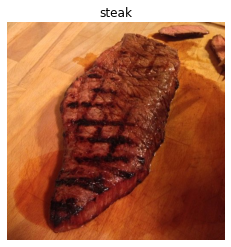

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")

['1048649.jpg']
Image shape: (512, 512, 3)


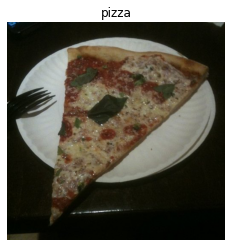

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale(also reffered to as normalize) their pixels values by dividing the image arrays by 255

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 15,  28,  70],
        [  7,  26,  68],
        [  1,  33,  74],
        ...,
        [110, 111, 103],
        [ 90,  92,  81],
        [ 68,  68,  58]],

       [[  8,  25,  55],
        [  3,  26,  60],
        [  3,  35,  74],
        ...,
        [ 99, 100,  92],
        [ 74,  76,  65],
        [ 48,  50,  39]],

       [[  4,  23,  38],
        [  0,  24,  48],
        [  4,  37,  72],
        ...,
        [ 80,  83,  74],
        [ 51,  53,  42],
        [ 27,  29,  18]],

       ...,

       [[ 52,  46,  20],
        [ 53,  49,  22],
        [ 52,  48,  21],
        ...,
        [  2,   4,   1],
        [  2,   4,   1],
        [  2,   4,   1]],

       [[ 51,  47,  20],
        [ 53,  49,  22],
        [ 53,  49,  22],
        ...,
        [  2,   4,   1],
        [  2,   4,   1],
        [  2,   4,   1]],

       [[ 51,  47,  20],
        [ 54,  50,  23],
        [ 53,  49,  22],
        ...,
        [  2,   4,   

## And end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we a need a way to: 
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our data
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1 ) -> Normalization
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "binary",
    seed = 42
)
valid_data = valid_datagen.flow_from_directory(
    directory = test_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "binary",
    seed = 42
)

# Build a CNN Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(
        pool_size = 2,
        padding = "valid",
    ),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")

])

# Compile our CNN
model_1.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 205ms/step - loss: 0.5670 - accuracy: 0.7020 - val_loss: 0.4239 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4358 - accuracy: 0.8080 - val_loss: 0.3308 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3953 - accuracy: 0.8240 - val_loss: 0.3220 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3457 - accuracy: 0.8533 - val_loss: 0.2979 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3053 - accuracy: 0.8800 - val_loss: 0.3418 - val_accuracy: 0.8600


**Note:** If the above cell is taking longer than ~ 10 seconds per epoch change the runtype to GPU

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared ir for our model, the main step here was scaling / normalization
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied

# 1. Become one with the Data

['676189.jpg']
Image shape: (512, 512, 3)
['61822.jpg']
Image shape: (341, 512, 3)


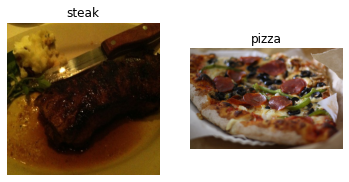

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only be able to look at 32 images at a time. 

it does this for a couple of reason
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit, could result in the model not being able to learn very well

In [ ]:
!nvidia-smi

Mon Dec  5 20:30:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |   2422MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory( 
    directory = train_dir, # Target directory of images
    target_size = (224, 224), # Target size of images (height, width)
    class_mode = "binary", # type of data you're working with
    batch_size = 32 # size of mini batches to load data into
)

test_data = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    class_mode = "binary",
    batch_size = 32
)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train batch
images, labels = train_data.next() # get the next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# view the first batch of labels
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a arelatively simple model or existing result that you steup when beginning a machine learning experiment, you try to beat the baseline

**Note:** In deep learning, there is almost an infinite amoun of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on ytour data and then introduce complexity as requiered (e.g. look at which current model is performing best in the field for your problem)

In [ ]:
# Make the createing of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential



In [ ]:
# Create the model
model_4 = Sequential([
    Conv2D( # This is the input shape
        filters = 10, # filters is the number of sliding windows across an input (higher = more complex)
        strides =(1, 1), # the size of the step the sliding window takes across an input
        padding = "valid", # if same, output shape is same as input shape
        activation = "relu",
        input_shape = (224,224,3), #if  "same output shape is same as input shape, if valid "
        kernel_size = (3,3),
    ),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

model_4.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)


In [ ]:
# Get a summary of the model
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


# 4. Fit the model


In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the Model
history_4 = model_4.fit(
    train_data,
    epochs =5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = (len(test_data))
)

Epoch 1/5
47/47 [==============================] - 11s 206ms/step - loss: 0.8726 - accuracy: 0.7000 - val_loss: 0.4054 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3861 - accuracy: 0.8400 - val_loss: 0.3564 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.2565 - accuracy: 0.9027 - val_loss: 0.3424 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.1449 - accuracy: 0.9467 - val_loss: 0.4158 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.0566 - accuracy: 0.9880 - val_loss: 0.3797 - val_accuracy: 0.8560


In [ ]:
# Evaluate model_1
model_1.evaluate(test_data)

16/16 [==============================] - 2s 134ms/step - loss: 0.3418 - accuracy: 0.8600


[0.3418104946613312, 0.8600000143051147]

### 5. Evaluate our model

It looks like our model is learning something, let's evaluate it.

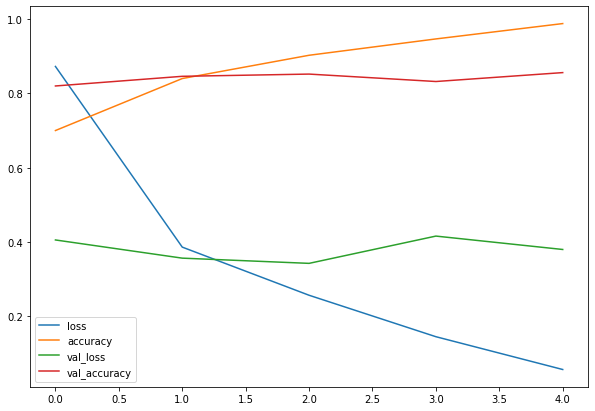

In [ ]:
# Evaluating our baseline model, plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_4.history).plot(figsize = (10,7))

In [ ]:
# Plot the validation and learning curves separately
def plot_loss_curves(history):
  """
  Returns separte loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"])) # Quantity of epochs we ran

  # Plot the loss
  plt.figure()
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("Loss")

  plt.legend();

  # Plo Accuracy
  plt.figure()
  plt.plot(epochs,accuracy, label = "accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();



**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well

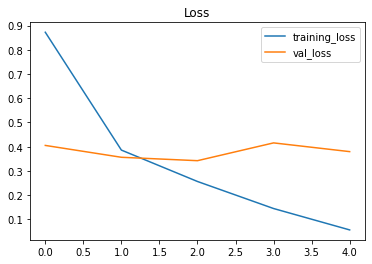

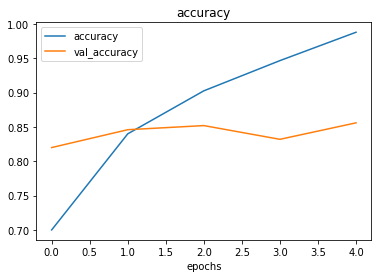

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation decreasing at similar rates), when there are are large differences your model may be overfitting

### 6. Adjust the model parameters
 Fitting a machine learning model comes in 3 steps:
 0. Create a baseline
 1. Beat the baseline by overfitting a larger model
 2. Reduce overfitting

 Ways to induce overfitting:

 * Increase the number of conv layers
 * Increase the number of conv filters
 * Add another dense layer to the output our flattened layer

 Ways to Reduce overfitting:
 * Add data augmentation
 * Add refularization layers (suvch as MaxPool2D)
 * Add more data
 

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(
        10,
        3,
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

In [ ]:
# Fit the model
history_5 = model_5.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 10s 190ms/step - loss: 0.6116 - accuracy: 0.6673 - val_loss: 0.4490 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4446 - accuracy: 0.7980 - val_loss: 0.3635 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4184 - accuracy: 0.8120 - val_loss: 0.3408 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.3858 - accuracy: 0.8253 - val_loss: 0.3306 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3518 - accuracy: 0.8520 - val_loss: 0.3311 - val_accuracy: 0.8640


In [ ]:
# Get a summary of our latest model with max pooling
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


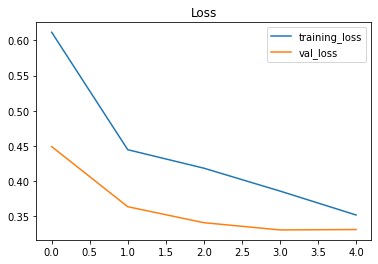

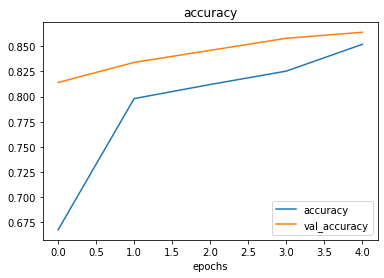

In [ ]:
# Plot loos curves
plot_loss_curves(history_5)

# Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2, # how much do wyou want to rotate an image?
    shear_range = 0.2, # how much do you want to shear an image
    zoom_range = 0.2, # how much do you want to zoom an image
    width_shift_range = 0.2, # how much do you want to move along the x axis
    height_shift_range = 0.3, # how much do you want to move along y-axis
    horizontal_flip = True # do you want to flip the image horizontaly
)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

**Data Augmentation:** is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mena adjusting the rotation of an image, flipping, or cropping etc

Let's write some code to visualize data augmentation...

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary",
    shuffle = False
)

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary",
    shuffle = False
)
IMG_SIZE = (224,224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = IMG_SIZE,
    batch_size = 32,
    class_mode = "binary"
)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using "ImageDataGenerator" built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model

Finally, Let's visualize some augmented data

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels are not augmente only data(images)



showing image number: 9


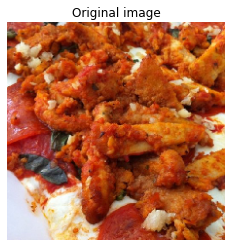

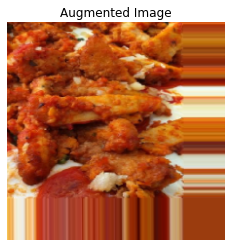

In [ ]:
# Show the original image and augmented image
import random
random_number = random.randint(0,32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False);
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

Let's build a modela and see how it learns in augmented data

In [ ]:
# Create a model 6 (same as model 5)
model_6 = Sequential([
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation ="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Compile the model
model_6.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_6 = model_6.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 22s 459ms/step - loss: 0.7330 - accuracy: 0.4653 - val_loss: 0.6963 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 21s 451ms/step - loss: 0.6928 - accuracy: 0.5733 - val_loss: 0.6829 - val_accuracy: 0.6260
Epoch 3/5
47/47 [==============================] - 21s 450ms/step - loss: 0.7060 - accuracy: 0.5653 - val_loss: 0.6717 - val_accuracy: 0.7300
Epoch 4/5
47/47 [==============================] - 21s 450ms/step - loss: 0.6969 - accuracy: 0.4760 - val_loss: 0.6713 - val_accuracy: 0.5800
Epoch 5/5
47/47 [==============================] - 23s 473ms/step - loss: 0.6898 - accuracy: 0.5653 - val_loss: 0.6545 - val_accuracy: 0.7900


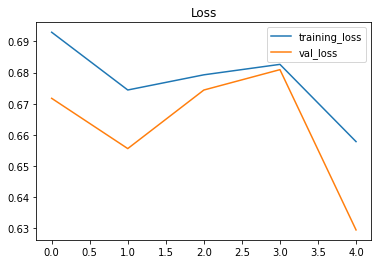

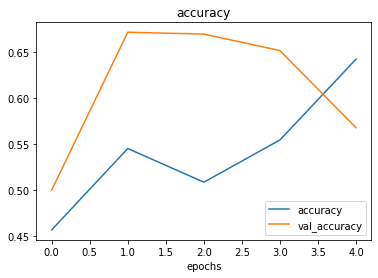

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during trainingm thus enabling it to learn features across a wide array of images ( in our case, pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers
* Increase the number of filter in each convolutional layers
* Train for longer (more epochs)
* Fine ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it to our model


## Making a prediction with our trained model on our custom data

In [ ]:
# Class we're working with
print(class_names)

NameError: ignored

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

--2022-12-06 00:33:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-12-06 00:33:13 (32.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



NameError: ignored

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

**Note:** when you train a neural network and you want to make a predicitons with your own custom data it is important that your custom data is pre-proccessed into the same format

In [ ]:
# Create a function to import an image and resize it to the correct format
def load_and_prep_image(filename, img_shape = 224):
  """
  Reads an image from filename, turns it into a tensor and reshapes 
  it to (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image (get all values between 0 & 1)
  img = img/255.

  return img

In [ ]:
# Load in and process our image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_6.predict(tf.expand_dims(steak, axis =0))

1/1 [==============================] - 0s 16ms/step


In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image locate at filename, makes prediction with model and 
  plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 15ms/step


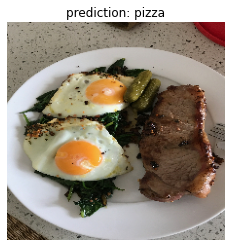

In [ ]:
# Test our model on a custom image
pred_and_plot(model_6, "03-steak.jpeg")

# Multiclass image Classification

We've just been through a bunch of the following steps with a binary classfication problem. Now we are going to look at 10 classes of food

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create the model (start with baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat until satisfied


In [ ]:
## 1. Import and become one with the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-12-06 00:39:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 108.177.12.128, 108.177.13.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.3’

10_food_classes_all 100%[===================>] 495.13M   162MB/s    in 3.1s    

2022-12-06 00:39:36 (162 MB/s) - ‘10_food_classes_all_data.zip.3’ saved [519183241/519183241]



In [ ]:
# Import os
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")

There are 2 directories and 0 images in '10_food_classes_all_data' 
There are 10 directories and 0 images in '10_food_classes_all_data/train' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice' 
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza' 

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3150031.jpg']
Image shape: (512, 512, 3)


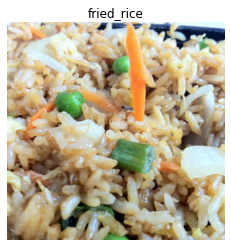

In [ ]:
# Visualize
import random
img = view_random_image(target_dir=train_dir, target_class = random.choice(class_names))

### Preprocess the data